In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

Downloaded from:  https://www.kaggle.com/andrewmvd/fetal-health-classification

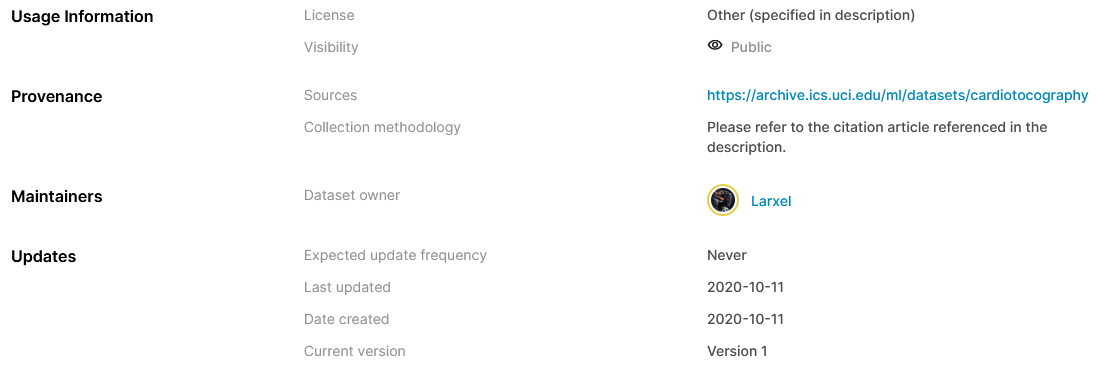

Citation

Ayres de Campos et al. (2000) SisPorto 2.0 A Program for Automated Analysis of Cardiotocograms. J Matern Fetal Med 5:311-318

https://onlinelibrary.wiley.com/doi/10.1002/1520-6661(200009/10)9:5%3C311::AID-MFM12%3E3.0.CO;2-9

License was not specified at the source, yet access to the data is public and a citation was requested.

### Fetal Health is output variable:
1 (Normal), 2 (Suspect) and 3 (Pathological)

In [2]:
df = pd.read_csv(r'..\data\raw\fetal_health.csv')

In [3]:
df.head()

baseline value  accelerations  fetal_movement  uterine_contractions  \
0           120.0          0.000             0.0                 0.000   
1           132.0          0.006             0.0                 0.006   
2           133.0          0.003             0.0                 0.008   
3           134.0          0.003             0.0                 0.008   
4           132.0          0.007             0.0                 0.008   

   light_decelerations  severe_decelerations  prolongued_decelerations  \
0                0.000                   0.0                       0.0   
1                0.003                   0.0                       0.0   
2                0.003                   0.0                       0.0   
3                0.003                   0.0                       0.0   
4                0.000                   0.0                       0.0   

   abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                             73.0                                   0.5   
1                             17.0                                   2.1   
2                             16.0                                   2.1   
3                             16.0                                   2.4   
4                             16.0                                   2.4   

   percentage_of_time_with_abnormal_long_term_variability  ...  histogram_min  \
0                                               43.0       ...           62.0   
1                                                0.0       ...           68.0   
2                                                0.0       ...           68.0   
3                                                0.0       ...           53.0   
4                                                0.0       ...           53.0   

   histogram_max  histogram_number_of_peaks  histogram_number_of_zeroes  \
0          126.0                        2.0                         0.0   
1          198.0                        6.0                         1.0   
2          198.0                        5.0                         1.0   
3          170.0                       11.0                         0.0   
4          170.0                        9.0                         0.0   

   histogram_mode  histogram_mean  histogram_median  histogram_variance  \
0           120.0           137.0             121.0                73.0   
1           141.0           136.0             140.0                12.0   
2           141.0           135.0             138.0                13.0   
3           137.0           134.0             137.0                13.0   
4           137.0           136.0             138.0                11.0   

   histogram_tendency  fetal_health  
0                 1.0           2.0  
1                 0.0           1.0  
2                 0.0           1.0  
3                 1.0           1.0  
4                 1.0           1.0  

[5 rows x 22 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [5]:
df.isna().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [6]:
df.duplicated().sum()

13

In [7]:
df.shape

(2126, 22)

In [8]:
df = df.drop_duplicates()

In [9]:
df.shape

(2113, 22)

In [10]:
df.nunique()

baseline value                                             48
accelerations                                              20
fetal_movement                                            102
uterine_contractions                                       16
light_decelerations                                        16
severe_decelerations                                        2
prolongued_decelerations                                    6
abnormal_short_term_variability                            75
mean_value_of_short_term_variability                       57
percentage_of_time_with_abnormal_long_term_variability     87
mean_value_of_long_term_variability                       249
histogram_width                                           154
histogram_min                                             109
histogram_max                                              86
histogram_number_of_peaks                                  18
histogram_number_of_zeroes                                  9
histogra

In [11]:
np.unique(np.array(df['severe_decelerations']))

array([0.   , 0.001])

In [12]:
np.unique(np.array(df['histogram_tendency']))

array([-1.,  0.,  1.])

In [13]:
df.describe()

baseline value  accelerations  fetal_movement  uterine_contractions  \
count     2113.000000    2113.000000     2113.000000           2113.000000   
mean       133.304780       0.003188        0.009517              0.004387   
std          9.837451       0.003871        0.046804              0.002941   
min        106.000000       0.000000        0.000000              0.000000   
25%        126.000000       0.000000        0.000000              0.002000   
50%        133.000000       0.002000        0.000000              0.005000   
75%        140.000000       0.006000        0.003000              0.007000   
max        160.000000       0.019000        0.481000              0.015000   

       light_decelerations  severe_decelerations  prolongued_decelerations  \
count          2113.000000           2113.000000               2113.000000   
mean              0.001901              0.000003                  0.000159   
std               0.002966              0.000057                  0.000592   
min               0.000000              0.000000                  0.000000   
25%               0.000000              0.000000                  0.000000   
50%               0.000000              0.000000                  0.000000   
75%               0.003000              0.000000                  0.000000   
max               0.015000              0.001000                  0.005000   

       abnormal_short_term_variability  mean_value_of_short_term_variability  \
count                      2113.000000                           2113.000000   
mean                         46.993848                              1.335021   
std                          17.177782                              0.884368   
min                          12.000000                              0.200000   
25%                          32.000000                              0.700000   
50%                          49.000000                              1.200000   
75%                          61.000000                              1.700000   
max                          87.000000                              7.000000   

       percentage_of_time_with_abnormal_long_term_variability  ...  \
count                                        2113.000000       ...   
mean                                            9.795078       ...   
std                                            18.337073       ...   
min                                             0.000000       ...   
25%                                             0.000000       ...   
50%                                             0.000000       ...   
75%                                            11.000000       ...   
max                                            91.000000       ...   

       histogram_min  histogram_max  histogram_number_of_peaks  \
count    2113.000000    2113.000000                2113.000000   
mean       93.564600     164.099858                   4.077142   
std        29.562269      17.945175                   2.951664   
min        50.000000     122.000000                   0.000000   
25%        67.000000     152.000000                   2.000000   
50%        93.000000     162.000000                   4.000000   
75%       120.000000     174.000000                   6.000000   
max       159.000000     238.000000                  18.000000   

       histogram_number_of_zeroes  histogram_mode  histogram_mean  \
count                 2113.000000     2113.000000     2113.000000   
mean                     0.325603      137.454330      134.599621   
std                      0.707771       16.402026       15.610422   
min                      0.000000       60.000000       73.000000   
25%                      0.000000      129.000000      125.000000   
50%                      0.000000      139.000000      136.000000   
75%                      0.000000      148.000000      145.000000   
max                     10.000000      187.000000      182.000000   

       histogram_median  histogr

<AxesSubplot:>

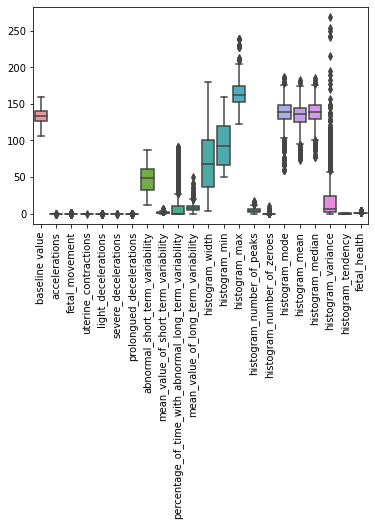

In [14]:
plt.xticks(rotation=90)
sns.boxplot(data=df)

<AxesSubplot:>

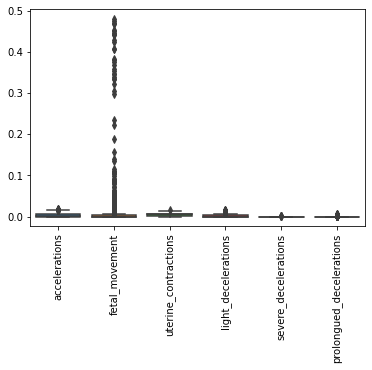

In [15]:
plt.xticks(rotation=90)
sns.boxplot(data= df.iloc[:, 1:7])

<AxesSubplot:>

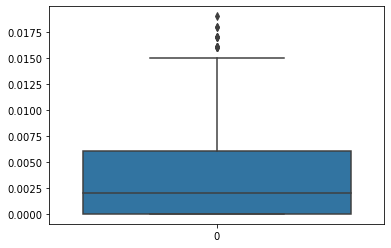

In [16]:
sns.boxplot(data= df['accelerations'])

<AxesSubplot:>

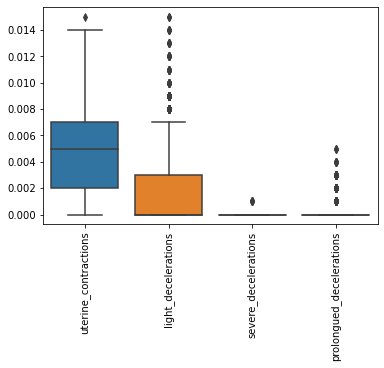

In [17]:
plt.xticks(rotation=90)
sns.boxplot(data= df.iloc[:, 3:7])

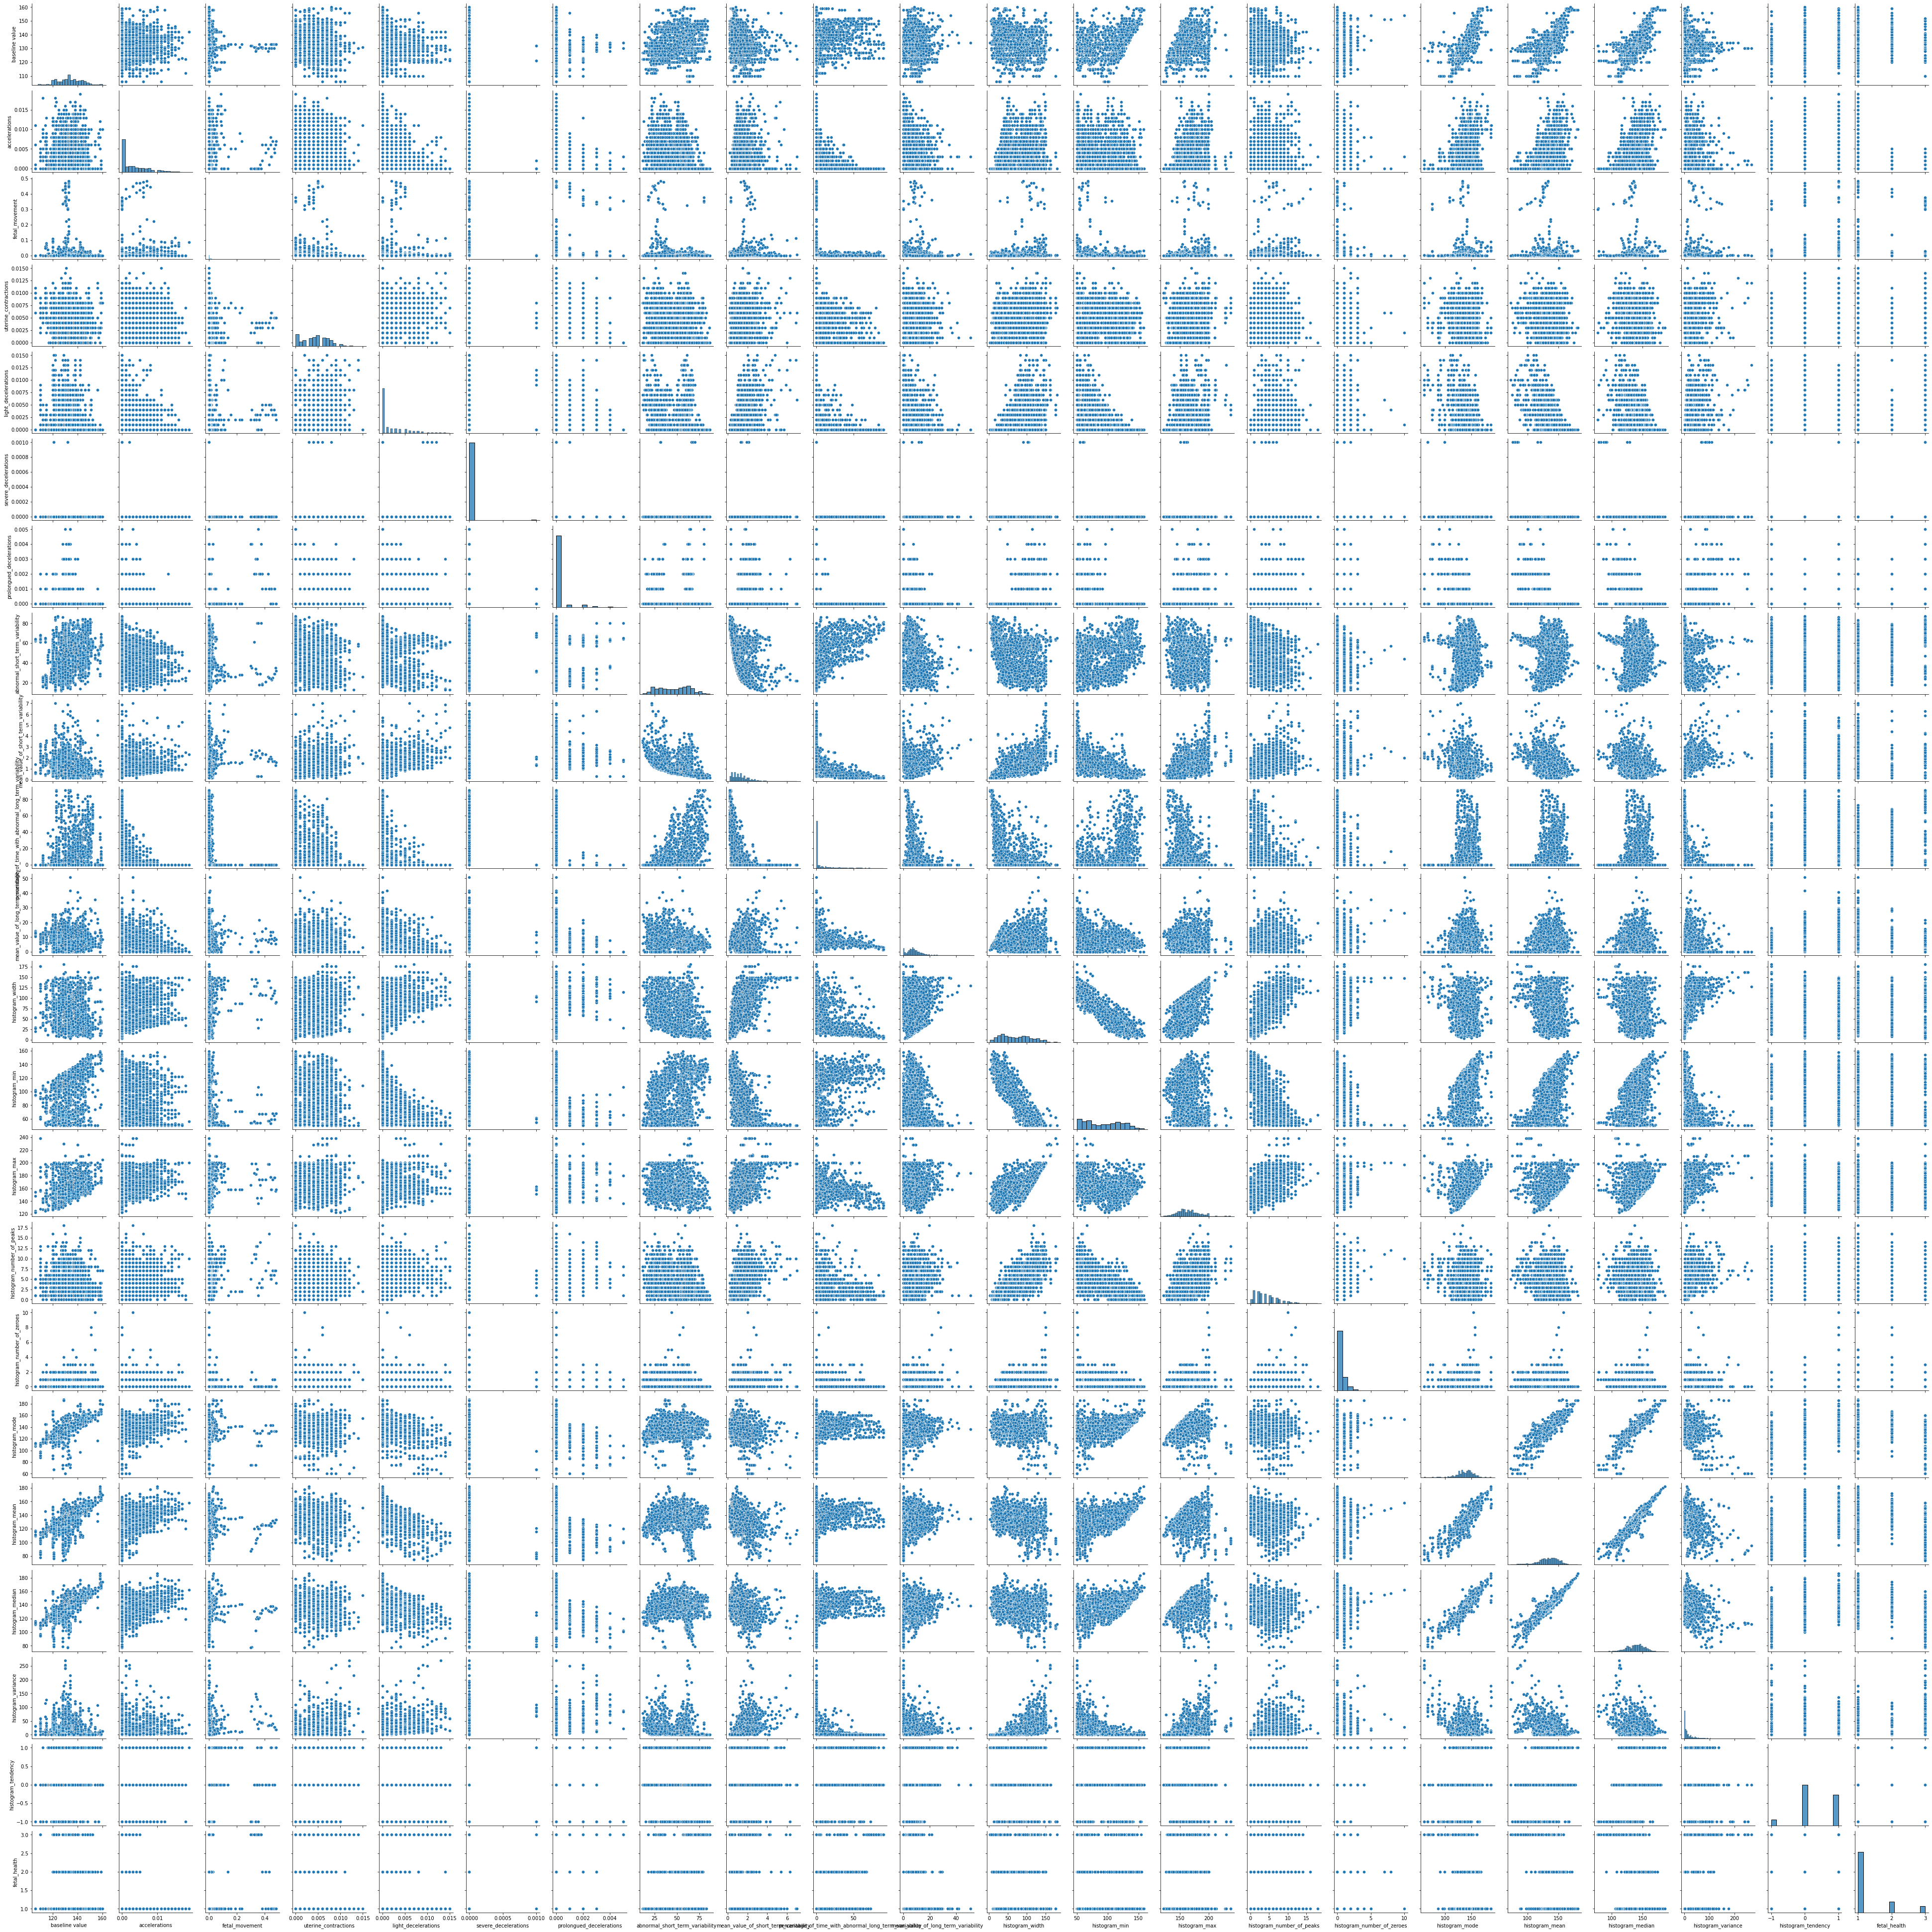

In [18]:
sns.pairplot(df)

<AxesSubplot:>

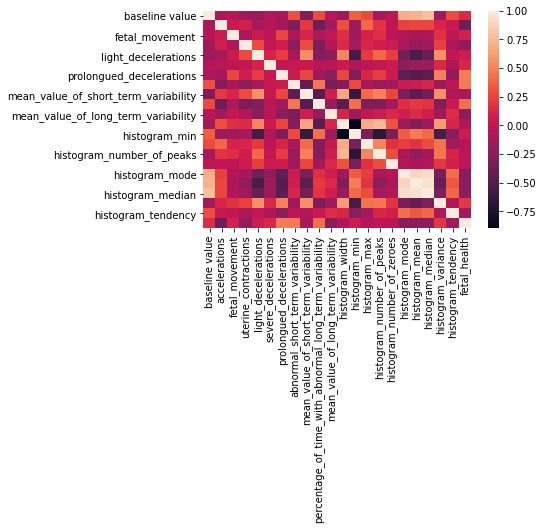

In [19]:
sns.heatmap(df.corr())

Histogram Median, Mode, and Mean are somewhat correlated. Need to keep an eye on these. May need to drop one or two of them.

<AxesSubplot:xlabel='fetal_health', ylabel='Count'>

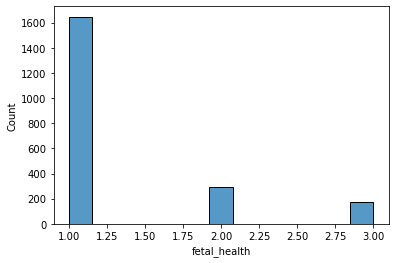

In [20]:
sns.histplot(df['fetal_health'])

<AxesSubplot:xlabel='histogram_tendency', ylabel='Count'>

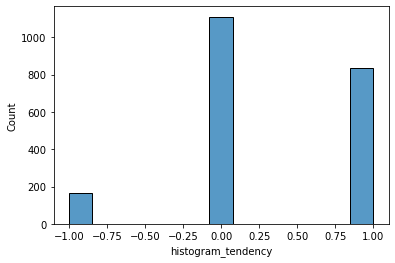

In [21]:
sns.histplot(df['histogram_tendency'])

<AxesSubplot:xlabel='histogram_variance', ylabel='Count'>

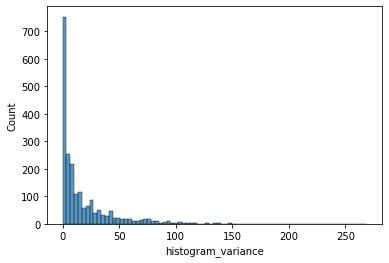

In [22]:
sns.histplot(df['histogram_variance'])

<AxesSubplot:xlabel='light_decelerations', ylabel='Count'>

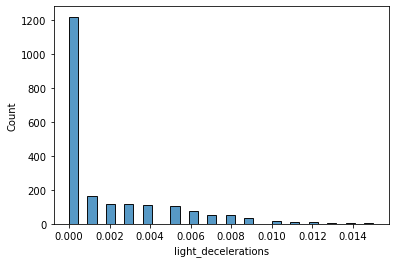

In [23]:
sns.histplot(df['light_decelerations'])

<AxesSubplot:xlabel='severe_decelerations', ylabel='Count'>

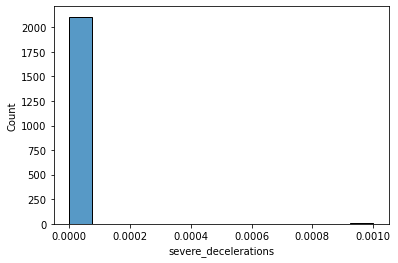

In [24]:
sns.histplot(df['severe_decelerations'])

<AxesSubplot:xlabel='prolongued_decelerations', ylabel='Count'>

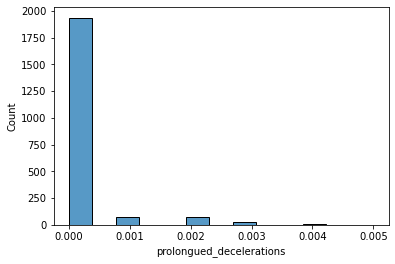

In [25]:
sns.histplot(df['prolongued_decelerations'])

<AxesSubplot:xlabel='histogram_number_of_zeroes', ylabel='Count'>

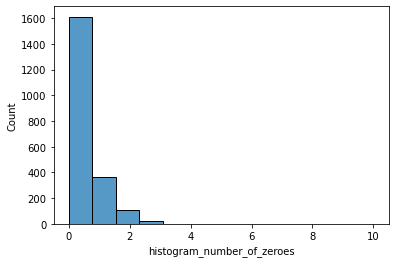

In [26]:
sns.histplot(df['histogram_number_of_zeroes'])

<AxesSubplot:xlabel='fetal_movement', ylabel='Count'>

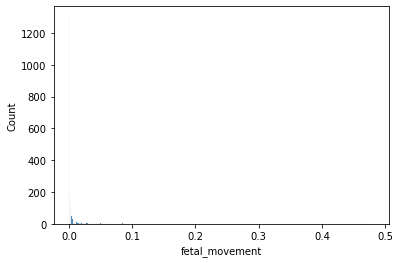

In [27]:
sns.histplot(df['fetal_movement'])

In [28]:
(df['fetal_movement'] == 0).sum()

1302

<AxesSubplot:xlabel='fetal_movement', ylabel='Count'>

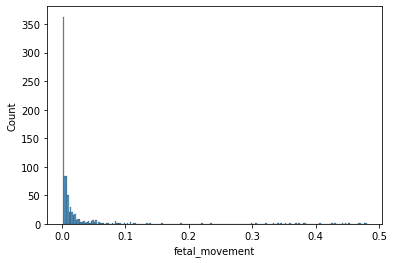

In [29]:
sns.histplot(df['fetal_movement'][df['fetal_movement'] >0])

histogram_tendency, severe_decelerations, and prolongued_decelerations all appear to be discrete (categorical) values

These will need to be one-hot encoded

In [30]:
(df['severe_decelerations'] == .001).sum()

7

In [31]:
(df['severe_decelerations'] != .001).sum()

2106

In [32]:
(df['severe_decelerations'] == 0).sum()

2106

In [33]:
df[df['severe_decelerations'] == .001]

baseline value  accelerations  fetal_movement  uterine_contractions  \
1488           132.0          0.002           0.000                 0.008   
1489           132.0          0.000           0.000                 0.006   
1791           121.0          0.000           0.001                 0.004   
1792           121.0          0.000           0.001                 0.003   
1793           121.0          0.000           0.001                 0.005   
1794           121.0          0.000           0.001                 0.003   
1795           121.0          0.000           0.000                 0.004   

      light_decelerations  severe_decelerations  prolongued_decelerations  \
1488                0.000                 0.001                     0.001   
1489                0.000                 0.001                     0.001   
1791                0.010                 0.001                     0.000   
1792                0.011                 0.001                     0.000   
1793                0.012                 0.001                     0.000   
1794                0.010                 0.001                     0.000   
1795                0.009                 0.001                     0.000   

      abnormal_short_term_variability  mean_value_of_short_term_variability  \
1488                             31.0                                   1.4   
1489                             32.0                                   1.3   
1791                             66.0                                   2.1   
1792                             67.0                                   2.1   
1793                             66.0                                   2.1   
1794                             68.0                                   2.1   
1795                             70.0                                   1.9   

      percentage_of_time_with_abnormal_long_term_variability  ...  \
1488                                                0.0       ...   
1489                                                0.0       ...   
1791                                                0.0       ...   
1792                                                0.0       ...   
1793                                                0.0       ...   
1794                                                0.0       ...   
1795                                                0.0       ...   

      histogram_min  histogram_max  histogram_number_of_peaks  \
1488           61.0          163.0                        5.0   
1489           60.0          151.0                        1.0   
1791           55.0          160.0                        7.0   
1792           55.0          157.0                        4.0   
1793           55.0          157.0                        5.0   
1794           55.0          157.0                        3.0   
1795           55.0          157.0                        6.0   

      histogram_number_of_zeroes  histogram_mode  histogram_mean  \
1488                         0.0            99.0           121.0   
1489                         1.0            99.0           116.0   
1791                         0.0            67.0            85.0   
1792                         1.0            67.0            81.0   
1793                         1.0            67.0            83.0   
1794                         1.0            67.0            79.0   
1795                         2.0            67.0            76.0   

      histogram_median  histogram_variance  histogram_tendency  fetal_health  
1488             129.0                94.0                 1.0           1.0  
1489             125.0                72.0                 1.0           3.0  
1791              92.0               109.0                -1.0           3.0  
1792              87.0                89.0                -1.0           3.0  
1793              90.0                98.0                -1.0           3.0  
1794              82.0                83.0    

There are only 7 rows where "Severe Decelerations" is .001 instead of 0. Only one of these is classified as "1" instead of "3" for fetal health. Will leave these rows in and just code them as 1 or zero.

In [34]:
df['severe_decelerations'].replace(.001, 1, inplace = True)

In [35]:
(df['severe_decelerations'] == .001).sum()

0

In [36]:
(df['severe_decelerations'] == 1).sum()

7

In [37]:
HT = pd.get_dummies(df['histogram_tendency'], prefix = 'HT')

In [38]:
HT.head()

HT_-1.0  HT_0.0  HT_1.0
0        0       0       1
1        0       1       0
2        0       1       0
3        0       0       1
4        0       0       1

In [39]:
PD = pd.get_dummies(df['prolongued_decelerations'], prefix = 'PD')

In [40]:
PD.head()

PD_0.0  PD_0.001  PD_0.002  PD_0.003  PD_0.004  PD_0.005
0       1         0         0         0         0         0
1       1         0         0         0         0         0
2       1         0         0         0         0         0
3       1         0         0         0         0         0
4       1         0         0         0         0         0

In [41]:
df = df.join(PD, how='left')

In [42]:
df = df.join(HT, how='left')

In [43]:
df.head()

baseline value  accelerations  fetal_movement  uterine_contractions  \
0           120.0          0.000             0.0                 0.000   
1           132.0          0.006             0.0                 0.006   
2           133.0          0.003             0.0                 0.008   
3           134.0          0.003             0.0                 0.008   
4           132.0          0.007             0.0                 0.008   

   light_decelerations  severe_decelerations  prolongued_decelerations  \
0                0.000                   0.0                       0.0   
1                0.003                   0.0                       0.0   
2                0.003                   0.0                       0.0   
3                0.003                   0.0                       0.0   
4                0.000                   0.0                       0.0   

   abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                             73.0                                   0.5   
1                             17.0                                   2.1   
2                             16.0                                   2.1   
3                             16.0                                   2.4   
4                             16.0                                   2.4   

   percentage_of_time_with_abnormal_long_term_variability  ...  fetal_health  \
0                                               43.0       ...           2.0   
1                                                0.0       ...           1.0   
2                                                0.0       ...           1.0   
3                                                0.0       ...           1.0   
4                                                0.0       ...           1.0   

   PD_0.0  PD_0.001  PD_0.002  PD_0.003  PD_0.004  PD_0.005  HT_-1.0  HT_0.0  \
0       1         0         0         0         0         0        0       0   
1       1         0         0         0         0         0        0       1   
2       1         0         0         0         0         0        0       1   
3       1         0         0         0         0         0        0       0   
4       1         0         0         0         0         0        0       0   

   HT_1.0  
0       1  
1       0  
2       0  
3       1  
4       1  

[5 rows x 31 columns]

In [44]:
df.drop(['histogram_tendency', 'prolongued_decelerations'], axis = 1, inplace = True)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2113 entries, 0 to 2125
Data columns (total 29 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2113 non-null   float64
 1   accelerations                                           2113 non-null   float64
 2   fetal_movement                                          2113 non-null   float64
 3   uterine_contractions                                    2113 non-null   float64
 4   light_decelerations                                     2113 non-null   float64
 5   severe_decelerations                                    2113 non-null   float64
 6   abnormal_short_term_variability                         2113 non-null   float64
 7   mean_value_of_short_term_variability                    2113 non-null   float64
 8   percentage_of_time_with_abnormal_long_

In [46]:
df.to_csv('../data/in-process/health_processed.csv')